In [1]:
%load_ext autoreload

In [2]:
%autoreload
from tqdm.notebook import tqdm
import numpy as np
from diff3d import DLA_diff3d
from diff2d import DLA_diff2d

import seaborn as sns
from collections import Counter
import itertools
import matplotlib.pyplot as plt

sns.set()
sns.set_context("talk")

In [3]:
def generate_tree_diff3d(PS):
    x, y, z = [40, 60, 40]
    eta = 1
    dla = DLA_diff3d(seed=[x//2, y - 1, z//2], x = x, y = y, z = z, eta=eta, w = 1, PS = PS)

    while not dla.converged:
        dla.update()

    for t in tqdm(range(150)):
        dla.growth(t + 1)

        while not dla.converged:
            dla.update()
    return dla

In [4]:
def generate_tree_diff2d(PS):
    x, y = [40, 80]
    eta = 1
    dla = DLA_diff2d(seed=[x//2, y - 1], x = x, y = y, eta=eta, w = 1, PS = PS)

    while not dla.converged:
        dla.update()

    for t in tqdm(range(150)):
        dla.growth(t + 1)

        while not dla.converged:
            dla.update()
    return dla

In [5]:
simulations = 5
PSs = [10, 20, 30, 40, 50]

generated_trees = dict()


In [6]:
for PS in PSs:
    generated_trees[PS] = []

In [7]:
for PS in PSs:
    for _ in range(simulations):
        # change model here either
        # generate_tree_diff3d
        # or 
        # generate_tree_diff2d
        generated_trees[PS].append(generate_tree_diff2d(PS))
        
generated_trees

{10: [<diff2d.DLA_diff2d at 0x7fe4a86be518>,
 20: [<diff2d.DLA_diff2d at 0x7fe4a8728828>,
 30: [<diff2d.DLA_diff2d at 0x7fe4a876db38>,
 40: [<diff2d.DLA_diff2d at 0x7fe4a87b95c0>,
 50: [<diff2d.DLA_diff2d at 0x7fe4a87f9e10>,
  <diff2d.DLA_diff2d at 0x7fe4a8833e48>]}

In [8]:
# for PS in PSs:
#     plt.figure()
#     branch_orders = []
#     for tree in generated_trees[PS]:
#         branch_orders += tree.tree.get_branch_orders()
#     plt.hist(branch_orders, bins = max(branch_orders))
#     plt.title("{}".format(PS))

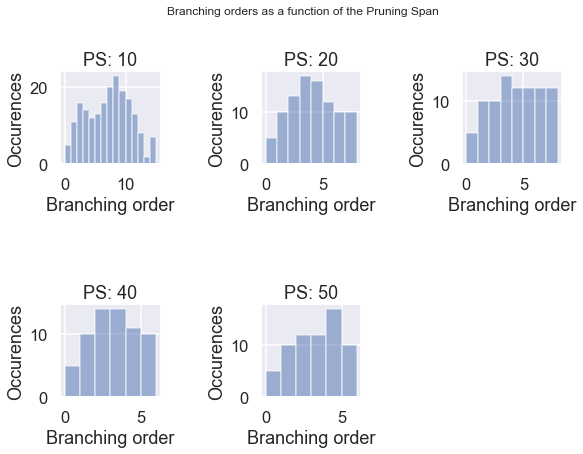

In [9]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))
ax = ax.flatten()
counter  = 0
for PS in PSs:

    branch_orders = []
    for tree in generated_trees[PS]:
        branch_orders += tree.tree.get_branch_orders()
    
    
    c = Counter(branch_orders)
    c = sorted(c.items())
    x, y = zip(*c)
    ax[counter].hist(branch_orders, alpha = 0.5, bins = max(branch_orders))
    ax[counter].set_title("PS: {}".format(PS))
    ax[counter].set_xlabel("Branching order")
    ax[counter].set_ylabel("Occurences")
    counter += 1

fig.delaxes(ax[counter])
fig.subplots_adjust(wspace = 1, hspace = 1.5)
fig.suptitle("Branching orders as a function of the Pruning Span", y = 1.03)
plt.ylabel("Occurences")
plt.show()

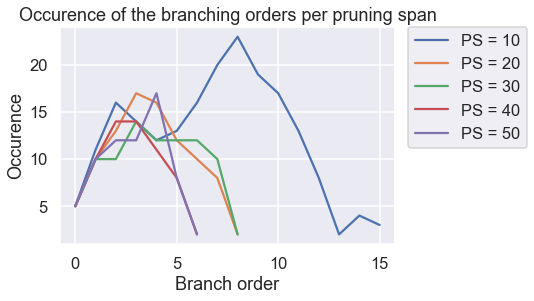

In [10]:
plt.figure()
for PS in PSs:

    branch_orders = []
    for tree in generated_trees[PS]:
        branch_orders += tree.tree.get_branch_orders()
    
    
    c = Counter(branch_orders)
    c = sorted(c.items())
    x, y = zip(*c)
    plt.plot(x, y, label='PS = {}'.format(PS))
        
plt.title("Occurence of the branching orders per pruning span")
plt.xlabel("Branch order")
plt.ylabel("Occurence")
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show()

In [11]:
means = []
errors = []
for PS in PSs:
    length_ratio = []

    for tree in generated_trees[PS]:
        length_ratio.append(tree.tree.get_lenghts_ratio())
        
    mean = np.mean(length_ratio)
    std = np.std(length_ratio)
    means.append(mean)
    errors.append(std)
    
    print("Length ratio = {} +- {}. For PS = {}".format(mean, std, PS))
    

Length ratio = 0.8678052974491581 +- 0.08669460056247938. For PS = 10
Length ratio = 0.585032903235032 +- 0.1136929080634685. For PS = 20
Length ratio = 0.402016434068084 +- 0.1208294028187571. For PS = 30
Length ratio = 0.47809136662795193 +- 0.32172142215593. For PS = 40
Length ratio = 0.5172661074695959 +- 0.19379310461079557. For PS = 50


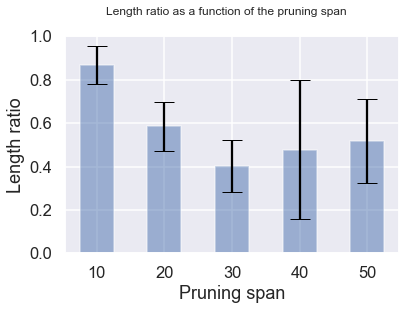

In [12]:
fig, ax = plt.subplots()
ax.bar(PSs, means, yerr=errors, width = 5, alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Length ratio')
ax.set_xlabel('Pruning span')
ax.set_xticks(PSs)
ax.yaxis.grid(True)
fig.suptitle("Length ratio as a function of the pruning span")
plt.show()


In [13]:
means = []
errors = []
for PS in PSs:
    asym = []

    for tree in generated_trees[PS]:
        asym.append(tree.tree.get_asymmetry_index())
    
    mean = np.mean(asym)
    std = np.std(asym)
    means.append(mean)
    errors.append(std)
    print("Asymmetry index = {} +- {}. For PS = {}".format(mean, std, PS))
    

Asymmetry index = 0.6414490488298538 +- 0.05734073400867662. For PS = 10
Asymmetry index = 0.6570346320346319 +- 0.11016690887953828. For PS = 20
Asymmetry index = 0.6771464646464647 +- 0.08098056087524601. For PS = 30
Asymmetry index = 0.6038095238095239 +- 0.12672036097889444. For PS = 40
Asymmetry index = 0.6330158730158729 +- 0.18106206645037892. For PS = 50


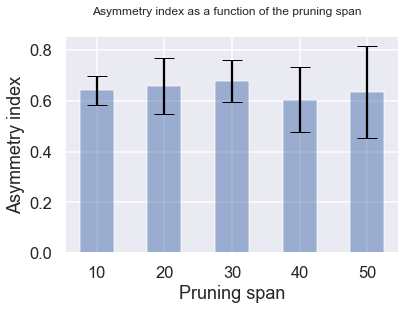

In [14]:
fig, ax = plt.subplots()
ax.bar(PSs, means, yerr=errors, width = 5, alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Asymmetry index')
ax.set_xlabel('Pruning span')
ax.set_xticks(PSs)
ax.yaxis.grid(True)
fig.suptitle("Asymmetry index as a function of the pruning span")
plt.show()

In [15]:
# beware for change in function name, leafs!=terminal segments
means = []
errors = []

for PS in PSs:
    leafs = []

    for tree in generated_trees[PS]:
        leafs.append(tree.tree.get_number_of_terminal_segments())
    
    mean = np.mean(leafs)
    std = np.std(leafs)
    means.append(mean)
    errors.append(std)
    
    print("Terminal leafs = {} +- {}. For PS = {}".format(mean, std, PS))



Terminal leafs = 21.0 +- 1.4142135623730951. For PS = 10
Terminal leafs = 10.0 +- 1.8973665961010275. For PS = 20
Terminal leafs = 9.2 +- 1.9390719429665315. For PS = 30
Terminal leafs = 7.0 +- 0.8944271909999159. For PS = 40
Terminal leafs = 7.2 +- 0.7483314773547882. For PS = 50


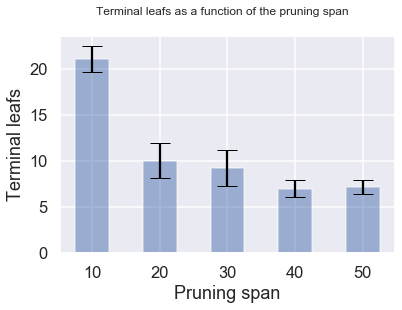

In [16]:
fig, ax = plt.subplots()
ax.bar(PSs, means, yerr=errors, width = 5, alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Terminal leafs')
ax.set_xlabel('Pruning span')
ax.set_xticks(PSs)
ax.yaxis.grid(True)
fig.suptitle("Terminal leafs as a function of the pruning span")
plt.show()